In [1]:
import pandas as pd
import numpy as np

#### Nesa etapa iremos fazer a definição de tipos, bem como o tratamentos dos dados faltantes,normalização, discretização e limpeza do dados. Todo o processo de pré processamento.

In [36]:
###Essa base é a base seed, através dos ids dos jogadores, iremos fazer os joins até chegar
###na base final utilizada nessa etapa
df_users_seed = pd.read_csv("SummonerFinalData.csv", index_col = 'accountId')

### Lista das 10 ultimas partidas de cada jogador na base seed. 
df_matches_acc_id = pd.read_csv("matchByAccounbtIdFiltered10.csv", index_col = 'accountId')

### Estatisticas de cada time dentro das partidas
df_match_stats = pd.read_csv("dataMatchesStats.csv", index_col = 'gameId')

### Estatisticas 
df_players_matches_stats = pd.read_csv("playersMatchesStats.csv", index_col = 'gameId')

In [23]:
####Print de algumas informações basicas######
print(df_users_seed.shape)
print(df_users_seed.dtypes)

(2661, 13)
Unnamed: 0        int64
tier             object
summonerId       object
summonerName     object
leaguePoints      int64
wins              int64
losses            int64
veteran            bool
inactive           bool
freshBlood         bool
hotStreak          bool
summonerLevel     int64
puuid            object
dtype: object


In [24]:
print(df_matches_acc_id.shape)
print(df_matches_acc_id.dtypes)

(53720, 8)
platformId    object
gameId         int64
champion       int64
queue          int64
season         int64
timestamp      int64
role          object
lane          object
dtype: object


In [25]:
print(df_match_stats.shape)
print(df_match_stats.dtypes)

(60654, 16)
teamId                   int64
win                     object
firstBlood                bool
firstTower                bool
firstInhibitor            bool
firstBaron                bool
firstDragon               bool
firstRiftHerald           bool
towerKills               int64
inhibitorKills           int64
baronKills               int64
dragonKills              int64
vilemawKills             int64
riftHeraldKills          int64
dominionVictoryScore     int64
bans                    object
dtype: object


In [26]:
print(df_players_matches_stats.shape)
print(df_players_matches_stats.dtypes)

(303252, 13)
champion              int64
spell1                int64
spell2                int64
win                    bool
kills                 int64
deaths                int64
assists               int64
totalDamageDealt      int64
goldEarned            int64
champLevel            int64
totalMinionsKilled    int64
item0                 int64
item1                 int64
dtype: object


In [73]:
###Checar com professor a questão de tipagem.

In [27]:
####Dropando essa coluna intrusa
df_users_seed.drop('Unnamed: 0', axis = 1, inplace=True)

**Ajuste de Tipos**

In [28]:
### Ajuste de tipos da base de usuários

### Minha dúvida é se identificadores como (puuid ou summonerId são categoricos ou string, porque categorico é tecnicamente finito)
df_users_seed['tier'] = df_users_seed['tier'].astype('category')
df_users_seed['summonerId'] = df_users_seed['summonerId'].astype('string')
df_users_seed['summonerName'] = df_users_seed['summonerName'].astype('string')
df_users_seed['puuid'] = df_users_seed['puuid'].astype('string')

print(df_users_seed.dtypes)
print(df_users_seed['tier'].cat.categories)
# df_users_seed.head()

tier             category
summonerId         string
summonerName       string
leaguePoints        int64
wins                int64
losses              int64
veteran              bool
inactive             bool
freshBlood           bool
hotStreak            bool
summonerLevel       int64
puuid              string
dtype: object
Index(['DIAMONDI', 'DIAMONDII', 'DIAMONDIII', 'DIAMONDIV', 'MASTER'], dtype='object')


In [29]:
### Ajuste de tipos da lista de partidas

### Platform ID pode ser considerado uma categoria mesmo só tendo dados de BR1? Season pode ser uma categoria?
df_matches_acc_id['platformId'] = df_matches_acc_id['platformId'].astype('category')
df_matches_acc_id['role'] = df_matches_acc_id['role'].astype('category')
df_matches_acc_id['lane'] = df_matches_acc_id['lane'].astype('category')

print(df_matches_acc_id.dtypes)
print(df_matches_acc_id['platformId'].cat.categories)
print(df_matches_acc_id['role'].cat.categories)
print(df_matches_acc_id['lane'].cat.categories)

platformId    category
gameId           int64
champion         int64
queue            int64
season           int64
timestamp        int64
role          category
lane          category
dtype: object
Index(['BR1'], dtype='object')
Index(['DUO', 'DUO_CARRY', 'DUO_SUPPORT', 'NONE', 'SOLO'], dtype='object')
Index(['BOTTOM', 'JUNGLE', 'MID', 'NONE', 'TOP'], dtype='object')


In [38]:
### Ajuste d etipos das estatisticas da partida

df_match_stats['win'] = df_match_stats['win'].astype('category')

print(df_match_stats.dtypes)
print(df_match_stats['win'].cat.categories)

teamId                     int64
win                     category
firstBlood                  bool
firstTower                  bool
firstInhibitor              bool
firstBaron                  bool
firstDragon                 bool
firstRiftHerald             bool
towerKills                 int64
inhibitorKills             int64
baronKills                 int64
dragonKills                int64
vilemawKills               int64
riftHeraldKills            int64
dominionVictoryScore       int64
bans                      object
dtype: object
Index(['Fail', 'Win'], dtype='object')


In [39]:
### Ajuste de tipos das estatisticas do jogador na partida

df_players_matches_stats.dtypes

champion              int64
spell1                int64
spell2                int64
win                    bool
kills                 int64
deaths                int64
assists               int64
totalDamageDealt      int64
goldEarned            int64
champLevel            int64
totalMinionsKilled    int64
item0                 int64
item1                 int64
dtype: object

**Checagem de dados faltantes**

In [ ]:
def getMissData(df):
     return pd.DataFrame({'names' : df.columns, 'types' : df.dtypes, 'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})
    

In [83]:
### Dados faltantes
getMissData(df_users_seed)

,names,types,NA #,NA %
tier,tier,category,0,0.0
summonerId,summonerId,string,0,0.0
summonerName,summonerName,string,0,0.0
leaguePoints,leaguePoints,int64,0,0.0
wins,wins,int64,0,0.0
losses,losses,int64,0,0.0
veteran,veteran,bool,0,0.0
inactive,inactive,bool,0,0.0
freshBlood,freshBlood,bool,0,0.0
hotStreak,hotStreak,bool,0,0.0


In [78]:
### Como os dados foram obtidos através de api, não temos dados faltantes

In [79]:
df_matches_acc_id.columns

Index(['platformId', 'gameId', 'champion', 'queue', 'season', 'timestamp',
       'role', 'lane'],
      dtype='object')

In [80]:
df_matches_acc_id.head(2)

,platformId,gameId,champion,queue,season,timestamp,role,lane
accountId,,,,,,,,
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2071507283,114,440,13,1601166961222,SOLO,TOP
bk1m2_GS-2L9loYOKil6EbsEHnQOCY15LRVByLuQvjf46Cc,BR1,2071513192,236,440,13,1601164763566,DUO,TOP


In [84]:
### Dados faltantes
getMissData(df_matches_acc_id)

,names,types,NA #,NA %
platformId,platformId,category,0,0.0
gameId,gameId,int64,0,0.0
champion,champion,int64,0,0.0
queue,queue,int64,0,0.0
season,season,int64,0,0.0
timestamp,timestamp,int64,0,0.0
role,role,category,0,0.0
lane,lane,category,0,0.0


**Detecção de Outliers**

In [39]:
### Minha dúvida aqui é o que agt pode considerar ser um outlier e em relação a oq e se vale a pena remover um outlier
### Não acho que valha a pena comparar com tier, já que é categorico

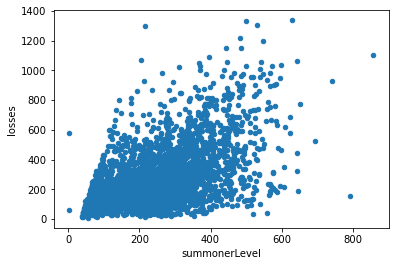

In [85]:
df_users_seed.plot.scatter(x='summonerLevel', y='losses')

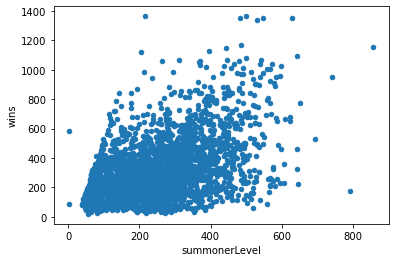

In [86]:
df_users_seed.plot.scatter(x='summonerLevel', y='wins')

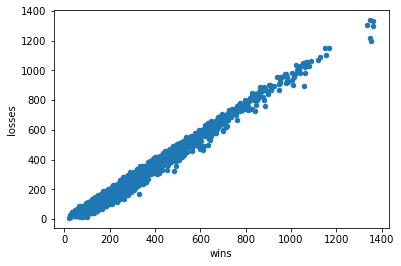

In [99]:
df_users_seed.plot.scatter(x='wins', y='losses')

In [87]:
df_users_seed['wins'].describe()

count    2661.000000
mean      320.681323
std       207.561816
min        20.000000
25%       172.000000
50%       269.000000
75%       421.000000
max      1363.000000
Name: wins, dtype: float64

In [88]:
df_users_seed['losses'].describe()

count    2661.000000
mean      290.610673
std       206.441510
min         8.000000
25%       141.000000
50%       239.000000
75%       390.000000
max      1338.000000
Name: losses, dtype: float64